## Maschinelles Lernen mit Scikit-Learn
### Live-Demo
Michael Fitzke, Deloitte 2016


### Abschnitt 1: Kurzvorstellung numpy

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
my_samp = np.random.normal(0,1,100)
my_samp

array([ 0.56635668,  0.37927774,  0.06954174, -0.63316411, -0.26095217,
       -0.1101544 , -0.2436065 ,  0.3578975 , -0.15476255,  0.49594803,
       -1.26223072,  0.86131037, -0.65703678, -2.6878605 , -1.69214855,
       -0.96944025, -0.83307569,  0.6917877 , -0.20682224,  0.14478796,
       -0.65948532, -2.91614416, -1.14894318, -0.16244834,  0.04730863,
       -1.39055074, -1.10617093,  0.42981594,  1.37505893,  1.10467633,
       -0.62592079, -0.36494944, -0.09806396, -1.65538356,  0.43896721,
        0.19565534,  0.50998515,  0.00547514, -0.36787026, -0.37465264,
        1.86281156,  1.56453424,  0.03039009, -0.30210999, -0.35091626,
       -1.37926974,  0.39499723, -0.90802873,  0.5460012 ,  1.91952603,
        0.6091899 ,  0.19865604, -0.36383366, -1.58018669, -1.29364041,
        1.1094047 ,  1.18053285,  0.00331188, -0.45367274,  1.80325325,
        0.76744252,  2.18751173,  0.40136731, -0.07980802,  0.07189603,
        0.32383506, -0.19690631, -0.05110265,  1.79709958,  0.71

In [3]:
shaped_samp = my_samp.reshape(50,2)
shaped_samp

array([[ 0.56635668,  0.37927774],
       [ 0.06954174, -0.63316411],
       [-0.26095217, -0.1101544 ],
       [-0.2436065 ,  0.3578975 ],
       [-0.15476255,  0.49594803],
       [-1.26223072,  0.86131037],
       [-0.65703678, -2.6878605 ],
       [-1.69214855, -0.96944025],
       [-0.83307569,  0.6917877 ],
       [-0.20682224,  0.14478796],
       [-0.65948532, -2.91614416],
       [-1.14894318, -0.16244834],
       [ 0.04730863, -1.39055074],
       [-1.10617093,  0.42981594],
       [ 1.37505893,  1.10467633],
       [-0.62592079, -0.36494944],
       [-0.09806396, -1.65538356],
       [ 0.43896721,  0.19565534],
       [ 0.50998515,  0.00547514],
       [-0.36787026, -0.37465264],
       [ 1.86281156,  1.56453424],
       [ 0.03039009, -0.30210999],
       [-0.35091626, -1.37926974],
       [ 0.39499723, -0.90802873],
       [ 0.5460012 ,  1.91952603],
       [ 0.6091899 ,  0.19865604],
       [-0.36383366, -1.58018669],
       [-1.29364041,  1.1094047 ],
       [ 1.18053285,

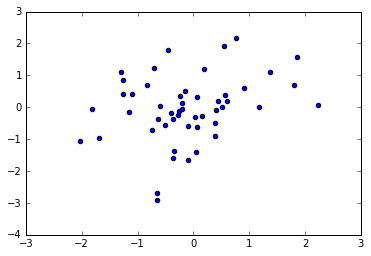

In [4]:
plt.scatter(shaped_samp[:,0], shaped_samp[:,1])

### Abschnitt 2: SMS-Spam Beispiel

In [5]:
import os
with open(os.path.join("smsspam", "SMSSpamCollection")) as f:
    lines = [line.strip().split("\t") for line in f.readlines()]
text = [x[1] for x in lines]
y = [x[0] == "ham" for x in lines]

In [6]:
text[5:15]


["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, $1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea $900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
 'URGENT! You have won a 

In [7]:
y[5:15]

[False, True, True, False, False, True, False, False, True, True]

<img src="notebook_images/tokenizer2.png" width="100%">

In [8]:
X = ["Some say the world will end in fire",
     "some say in ice"]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
vectorizer.vocabulary_

{u'end': 0,
 u'fire': 1,
 u'ice': 2,
 u'in': 3,
 u'say': 4,
 u'some': 5,
 u'the': 6,
 u'will': 7,
 u'world': 8}

In [11]:
X_bag_of_words = vectorizer.transform(X)

In [12]:
X_bag_of_words

<2x9 sparse matrix of type '<type 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [13]:
X_bag_of_words.toarray()

array([[1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0]], dtype=int64)

In [14]:
vectorizer.get_feature_names()

[u'end', u'fire', u'ice', u'in', u'say', u'some', u'the', u'will', u'world']

In [15]:
vectorizer.inverse_transform(X_bag_of_words)

[array([u'end', u'fire', u'in', u'say', u'some', u'the', u'will', u'world'], 
       dtype='<U5'), array([u'ice', u'in', u'say', u'some'], 
       dtype='<U5')]

### Abschnitt 3: Training- und Test-Daten & Vorbereitung der Daten

Um evaluieren zu können ob unser Modell generalisiert, sollten wir unsere Daten in Training- und Test-Daten aufspalten:

<img src="notebook_images/train_test_split.svg" width="100%">

In [16]:
from sklearn.cross_validation import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [18]:
print(len(vectorizer.vocabulary_))

7464


In [19]:
X_train.shape

(4180, 7464)

In [20]:
print(vectorizer.get_feature_names()[1500:1520])

[u'bull', u'bullshit', u'bundle', u'bunkers', u'buns', u'burger', u'burgundy', u'burial', u'burn', u'burning', u'burns', u'burrito', u'bus', u'bus8', u'buses', u'busetop', u'business', u'busty', u'busy', u'but']


In [21]:
print(X_train.shape)
print(X_test.shape)

(4180, 7464)
(1394, 7464)


### Abschnitt 4: Klassifierung durch Decision Trees (ÄNDERN IN NIGERIA SPAM) 

<img src="trees_my.png" width="33%">

In [22]:
from sklearn.tree import DecisionTreeClassifier
 
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
tree.score(X_test, y_test)

0.96700143472022959

### Abschnitt 5: Random Forests 
Random Forests sind mehrere Bäume, die jeweils bedingt durch Zufall, anders aufgebaut werden. 
<img src="noterand_forest.png" width="50%">

Im Falle einer Klassifikation erfolgt die Vorhersage als Mehrheitsentscheidung

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
clf.score(X_test, y_test)

0.97991391678622664

In [28]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.feature_importances_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

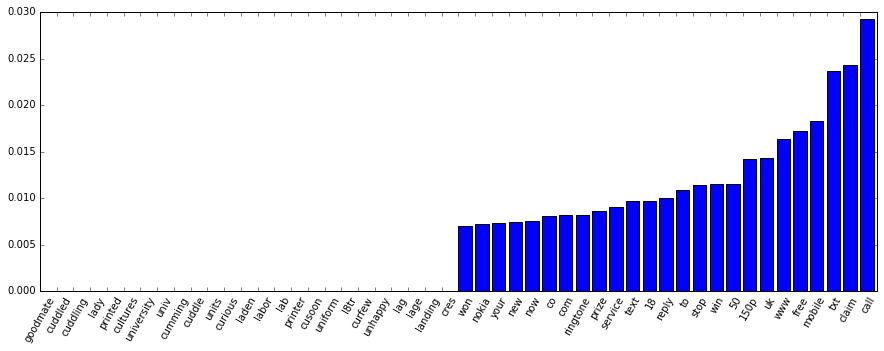

In [29]:
visualize_coefficients(clf, vectorizer.get_feature_names())

### Vorhersage eines Satzes  

In [30]:
text_predict = ["Ladies and Gentlemen. I'm a rich prince from Nigeria and I am with you in an urgent matter! \
                I have a total of 1,040,000 U.S. dollars, which I gladly donate to you .... please reply \
                very quickly with our personal information so we contact to this e-mail! Thank you and \
                bless you."]
vector_predict = vectorizer.transform(text_predict)
vector_predict

<1x7464 sparse matrix of type '<type 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [31]:
clf.predict(vector_predict)

array([ True], dtype=bool)